# Exploring Debugging Book Slicer

Andreas Zeller: "Tracking Failure Origins". In Andreas Zeller, "The Debugging Book", https://www.debuggingbook.org/html/Slicer.html. 

In [1]:
from debuggingbook.Slicer import Slicer
from debuggingbook.Slicer import *
from debuggingbook.bookutils import print_content

Define a few test functions. 

In [2]:
def test2(param):
    n = param 
    arr = [-4, 3, 2]
    i = 1
    z = 0
    while i <= n:
        x = arr[i-1]
        if x < 0:
            y = x + 1
        else:
            y = x + 2
        z = y
        i = i + 1
    print(z)

In [3]:
def test1(param):
    n = param
    i = 1
    sum = 0
    prod = 1 
    while i <= n:
        sum = sum + i
        prod = prod * i
        i = i + 1
    print(sum)
    print(prod)
    p = test2(n)

In [4]:
def test3(param):
    n = param
    if n > 1:
        n = 11
    else:
        n = 12
    print(n)

In [59]:
def fact(n):
    if n == 1:
        ret = n
        return ret
    else:
        return n * fact(n-1)


In [60]:
with Slicer(fact, log=True) as slicer:
    fact(5)

Instrumenting <function fact at 0x7ff2c0e17430>
def fact(n):
    _data.param('n', n, pos=1, last=True)
    if _data.test(_data.get('n', n) == 1):
        with _data:
            ret = _data.set('ret', _data.get('n', n))
            return _data.set('<fact() return value>', _data.get('ret', ret))
    else:
        with _data:
            return _data.set('<fact() return value>', _data.get('n', n) * _data.ret(_data.call(_data.get('fact', fact))(_data.arg(_data.get('n', n) - 1, pos=1))))



In [61]:
slicer.code()

*    1 def fact(n):  # <= n (1); <- <test> (2)
*    2     if n == 1:  # <= n (1); <- <test> (2)
*    3         ret = n  # <= n (1); <- <test> (2)
*    4         return ret  # <= ret (3); <- <test> (2)
     5     else:
*    6         return n * fact(n-1)  # <= n (1); <- <test> (2)


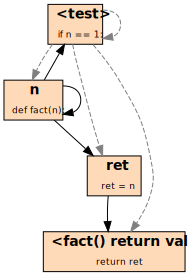

In [62]:
s = slicer.dependencies().backward_slice((fact, 4))
s

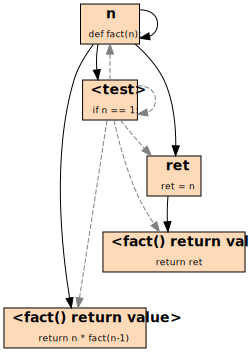

In [63]:
slicer_deps = slicer.dependencies()
slicer_deps

In [64]:
s.all_vars()

{('<fact() return value>', (<function __main__.fact(n)>, 4)),
 ('<test>', (<function __main__.fact(n)>, 2)),
 ('n', (<function __main__.fact(n)>, 1)),
 ('ret', (<function __main__.fact(n)>, 3))}

In [27]:
s.all_vars()

set()

In [17]:
s.code()